<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Изучим-модель-Logistic-Regression." data-toc-modified-id="Изучим-модель-Logistic-Regression.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучим модель Logistic Regression.</a></span></li><li><span><a href="#Изучим-модель-Random-Forest-Classifier." data-toc-modified-id="Изучим-модель-Random-Forest-Classifier.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изучим модель Random Forest Classifier.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#class_weight" data-toc-modified-id="class_weight-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>class_weight</a></span></li><li><span><a href="#Уменьшение-выборки----downsample." data-toc-modified-id="Уменьшение-выборки----downsample.-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Уменьшение выборки -- downsample.</a></span></li><li><span><a href="#Увеличение-классов----upsampled." data-toc-modified-id="Увеличение-классов----upsampled.-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Увеличение классов -- upsampled.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Описание данных
Признаки:

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак

* Exited — факт ухода клиента


In [1]:
# Загрузим все необходимые библиотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import (
    accuracy_score, roc_curve, roc_auc_score,
    precision_score, recall_score, f1_score
)
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Чтобы предупреждение не появлялось, в код добавляют строчку.
pd.options.mode.chained_assignment = None

RANDOM_STATE =12345

In [2]:
# Загрузим файл в проект.
df = pd.read_csv('Churn.csv')


In [3]:
# Создадим функцию для отображения общей информации о датафрейме.
def review(df: pd.DataFrame, limit_na_category: int=10) -> None:
    '''Функция получения первичной информации о датафрейме'''
    print ('----- Случайные 5 строк -----')
    display(df.sample(5))
    print('')
    print('----- Информация по данным -----')
    df.info()
    print('')
    print ('----- Пропуски -----')
    count = 0
    shape_0 = df.shape[0]
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(f'{element} - {df[element].isna().sum()} пропусков {round(df[element].isna().sum() * 100 / shape_0,2)}% от числа строк.')
            count = +1
    if count == 0:
        print('Пропусков нет')
        print()
    print('----- Дубликаты -----')
    if df.duplicated().sum() > 0:
        print(f'Количество дубликатов: {df.duplicated().sum()}')
    else:
        print('Дубликатов нет')
    # ищем, есть ли категориальные столбцы (содержащие до limit_na_category уникальных значений) в датафрейме
    min_unique = limit_na_category + 1
    for element in df.columns:
        min_unique = min(min_unique, df[element].nunique())
        if min_unique <= limit_na_category:
            print()
    print('----- Категориальные признаки -----')
    for element in df.columns:
        if df[element].nunique() <= limit_na_category:
            print(f'{element}: {df[element].nunique()} категории- {df[element].unique()}')
    print()
    print('----- Статистика по данным -----')
    display(df.describe(include='all', datetime_is_numeric=True))
    print('----- Количество каждого значения для столбца -----')
    for element in df.columns:
        display(df[element].value_counts())


In [4]:
# Посмотрим данные.
review(df)


----- Случайные 5 строк -----


RowNumber  CustomerId  Surname  CreditScore Geography  Gender  Age  \
6938       6939    15698324  Azikiwe          725    France  Female   33   
92           93    15809248     Cole          524    France  Female   36   
5019       5020    15584113    Pratt          823   Germany  Female   53   
8691       8692    15632439    Pinto          698    France  Female   39   
8127       8128    15623063   Taylor          651   Germany    Male   35   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
6938     4.0       0.00              1          1               1   
92      10.0       0.00              2          1               0   
5019     NaN  124954.94              1          0               1   
8691     4.0       0.00              2          0               1   
8127     8.0  110067.71              1          1               0   

      EstimatedSalary  Exited  
6938         67879.80       0  
92          109614.57       0  
5019        131259.60       1  
8691         47455.82       0  
8127        127678.95       1


----- Информация по данным -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

----- Пропуски -----
Tenure - 909 пропусков 9.09% от числа 

RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age       Tenure        Balance  NumOfProducts    HasCrCard  \
count   10000.000000  9091.000000   10000.000000   10000.000000  10000.00000   
unique           NaN          NaN            NaN            NaN          NaN   
top              NaN          NaN            NaN            NaN          NaN   
freq             NaN          NaN            NaN            NaN          NaN   
mean       38.921800     4.997690   76485.889288       1.530200      0.70550   
std        10.487806     2.894723   62397.405202       0.581654      0.45584   
min        18.000000     0.000000       0.000000       1.000000      0.00000   
25%        32.000000     2.000000       0.000000       1.000000      0.00000   
50%        37.000000     5.000000   97198.540000       1.000000      1.00000   
75%        44.000000     7.000000  127644.240000       2.000000      1.00000   
max        92.000000    10.000000  250898.090000       4.000000      1.00000   

        IsActiveMember  EstimatedSalary        Exited  
count     10000.000000     10000.000000  10000.000000  
unique             NaN              NaN           NaN  
top                NaN              NaN           NaN  
freq               NaN              NaN           NaN  
mean          0.515100    100090.239881      0.203700  
std           0.499797     57510.492818      0.402769  
min           0.000000        11.580000      0.000000  
25%           0.000000     51002.110000      0.000000  
50%           1.000000    100193.915000      0.000000  
75%           1.000000    149388.247500      0.000000  
max           1.000000    199992.480000      1.000000

----- Количество каждого значения для столбца -----


1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

1    7055
0    2945
Name: HasCrCard, dtype: int64

1    5151
0    4849
Name: IsActiveMember, dtype: int64

24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: EstimatedSalary, Length: 9999, dtype: int64

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
# посмотрим статистики по столбцу Tenure
df['Tenure'].describe()


count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

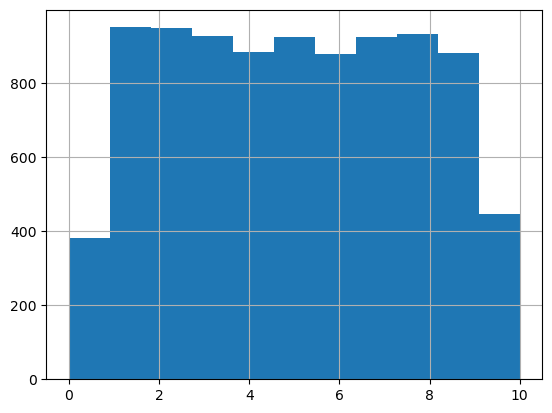

In [6]:
# построим гистограмму по столбцу Tenure.
df['Tenure'].hist(bins=11)
plt.show()


In [7]:
# Так как природа отсутствия значений неизвестна, заменим отсутствующие значения в столбце на заглужку -1.
df['Tenure'].fillna(-1, inplace=True)

In [8]:
# проверим на отсутствующие значения.
df.isna().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# удалим столбцы RowNumber, CustomerId, Surname. Предполагаем, что id и фамилия клиента не ввлияет на его уход из банка.
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)


In [10]:
# проверим результат.
display(df.columns)


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
display(df.head())

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42     2.0       0.00              1   
1          608     Spain  Female   41     1.0   83807.86              1   
2          502    France  Female   42     8.0  159660.80              3   
3          699    France  Female   39     1.0       0.00              2   
4          850     Spain  Female   43     2.0  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

### Вывод

* Посмотрели данные, выяснили, что клиентами банка являются жители стран France, Germany, Spain.
* Женщин среди клиентов, меньше чем мужчин почти на 1000.
* Возраст клиентов от 18 и до 92 лет.
* Подавляющее большенство клиентов используют 1 или 2 продукта банка, тогда как всего он предлагает их четыре.
* Из 10000 клиентов кредитной картой пользуются 7055 человек.
* Количество лет, в течении которых люди из выборки являлись клиентами банка, варьируется от 0 до 10 лет.
* На момент предоставления выборки выяснено, что почти 20% клиентов прекратили отношения с банком.


## Исследование задачи

In [12]:
# Применим one hot encoding к датафрейму, избежав дамми-ловушки "ловушку фиктивных признаков".
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()


CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42     2.0       0.00              1          1   
1          608   41     1.0   83807.86              1          0   
2          502   42     8.0  159660.80              3          1   
3          699   39     1.0       0.00              2          0   
4          850   43     2.0  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

In [13]:
# Создадим список с числовыми столбцами.
numeric = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']


In [14]:
# посмотрим корреляцию факторов
df_ohe.loc[:, numeric].corr()


CreditScore       Age   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.006268       0.012238   
Age                -0.003965  1.000000  0.028308      -0.030680   
Balance             0.006268  0.028308  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680 -0.304180       1.000000   
EstimatedSalary    -0.001384 -0.007201  0.012797       0.014204   
Tenure              0.003552 -0.006315 -0.005400       0.009661   

                 EstimatedSalary    Tenure  
CreditScore            -0.001384  0.003552  
Age                    -0.007201 -0.006315  
Balance                 0.012797 -0.005400  
NumOfProducts           0.014204  0.009661  
EstimatedSalary         1.000000  0.011174  
Tenure                  0.011174  1.000000

In [15]:
# построим heatmap матрицы корреляции.
sns.heatmap(df_ohe.loc[:, numeric].corr(),xticklabels=df_ohe.loc[:, numeric].corr().columns, yticklabels=df_ohe.loc[:, numeric].corr().columns)
plt.title('Heatmap матрица корреляции параметров исходных данных')
plt.show()


In [16]:
# Проверим наличие аномальных значений по числовым столбцам.
df_ohe[numeric].describe()


CreditScore           Age        Balance  NumOfProducts  \
count  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800   76485.889288       1.530200   
std       96.653299     10.487806   62397.405202       0.581654   
min      350.000000     18.000000       0.000000       1.000000   
25%      584.000000     32.000000       0.000000       1.000000   
50%      652.000000     37.000000   97198.540000       1.000000   
75%      718.000000     44.000000  127644.240000       2.000000   
max      850.000000     92.000000  250898.090000       4.000000   

       EstimatedSalary        Tenure  
count     10000.000000  10000.000000  
mean     100090.239881      4.452500  
std       57510.492818      3.254321  
min          11.580000     -1.000000  
25%       51002.110000      2.000000  
50%      100193.915000      4.000000  
75%      149388.247500      7.000000  
max      199992.480000     10.000000

In [17]:
# Посмотрим, как часто в целевом признаке исходного датасета встречается класс 1 или 0, и методом plot() с аргументом kind='bar' построим диаграмму.
frequency_of_0_1 = df['Exited'].value_counts(normalize=True)
display(frequency_of_0_1)
frequency_of_0_1.plot(kind='bar')


0    0.7963
1    0.2037
Name: Exited, dtype: float64

<Axes: >

In [18]:
# Выделим признаки.
features = df_ohe.drop('Exited', axis=1)
# Выделим целевой столбец.
target = df_ohe['Exited']


In [19]:
# Спрятанной тестовой выборки нет. Поэтому, данные разобьем на три части: обучающую, валидационную и тестовую. Исходные данные разбивают в соотношении 3:1:1.
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=RANDOM_STATE, stratify=target)

# Размер выборки  и обучающей выборки
print(features_train.shape)
print(target_train.shape)
print(f'Обучающая выборка составляет:  {target_train.shape[0]/target.shape[0]*100}% от исходного датасета')

# Валидационная и тестовая выборки.
features_valid, features_test, target_valid, target_test = train_test_split(features_test, target_test, test_size=0.5, random_state=RANDOM_STATE, stratify=target_test)

# Размер валидационной выборки
print(features_valid.shape)
print(target_valid.shape)
print(f'Валидационная выборка составляет:  {target_valid.shape[0]/target_train.shape[0]*100}% от исходного датасета')

# Размер тестовой выборки.
print(features_test.shape)
print(target_test.shape)
print(f'Тестовая выборка составляет:  {target_test.shape[0]/target_train.shape[0]*100}% от исходного датасета')

(6000, 11)
(6000,)
Обучающая выборка составляет:  60.0% от исходного датасета
(2000, 11)
(2000,)
Валидационная выборка составляет:  33.33333333333333% от исходного датасета
(2000, 11)
(2000,)
Тестовая выборка составляет:  33.33333333333333% от исходного датасета


In [20]:
# Создадим объект этой структуры и настроим его на обучающих данных. Настройка — это вычисление среднего и дисперсии.
scaler = StandardScaler()
scaler.fit(features_train[numeric])
# Преобразуем обучающую и валидационную выборки функцией transform(). Изменённые наборы сохраним в переменных: features_train_scaled (масштабированные признаки для обучения) и features_valid_scaled (масштабированные признаки для проверки).
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Вывод
Соотношение классов, примерно 1:4.
Классы несбалансированы. Видим, что клиенты уходят в 20% процентах случаев, т.е. класс "1" меньше класса "0" в 4 раза.
Изучим модели без исправление дисбаланса классов.

### Изучим модель Logistic Regression.
Обучим модель и измерим accuracy.


In [21]:
%%time

model_lr = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', C=2.01, fit_intercept=False)
model_lr.fit(features_train, target_train)

predicted_valid_lr = pd.Series(model_lr.predict(features_valid))
probabilities_one_valid = model_lr.predict_proba(features_valid)[:, 1]


CPU times: total: 15.6 ms
Wall time: 9.97 ms


In [22]:
# выводим метрики.
report_lr_train = classification_report(target_valid, predicted_valid_lr, output_dict=True)
# а затем создадим Dataframe.
report_lr = pd.DataFrame(report_lr_train).transpose()
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))

report_lr

ROC_auc: 0.7691598310178344


precision    recall  f1-score   support
0              0.835011  0.937814  0.883432  1592.000
1              0.533019  0.276961  0.364516   408.000
accuracy       0.803000  0.803000  0.803000     0.803
macro avg      0.684015  0.607387  0.623974  2000.000
weighted avg   0.773405  0.803000  0.777573  2000.000

### Изучим модель Random Forest Classifier.
Обучим модель и измерим accuracy.


In [23]:
%%time

model_rfc = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=RANDOM_STATE)
model_rfc.fit(features_train, target_train)
predicted_valid_rfc = pd.Series(model_rfc.predict(features_valid))
probabilities_one_valid = model_rfc.predict_proba(features_valid)[:, 1]


CPU times: total: 641 ms
Wall time: 664 ms


In [24]:
# выводим метрики.
report_rfc_train = classification_report(target_valid, predicted_valid_rfc, output_dict=True)
# а затем создадим Dataframe.
report_rfc = pd.DataFrame(report_rfc_train).transpose()

print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))

report_rfc

ROC_auc: 0.8664831510493645


precision    recall  f1-score    support
0              0.880692  0.959799  0.918545  1592.0000
1              0.758491  0.492647  0.597325   408.0000
accuracy       0.864500  0.864500  0.864500     0.8645
macro avg      0.819591  0.726223  0.757935  2000.0000
weighted avg   0.855763  0.864500  0.853016  2000.0000

In [25]:
# Сравним с работой константной модели.
target_pred_constant = pd.Series(0, target.index)
print(accuracy_score(target, target_pred_constant))


0.7963


Все же построенные модели предсказывают уход клиентов лучше, чем константная модель.

### Вывод

* Исследовали баланс классов - они несбалансированы;
* Изучили модели без учёта дисбаланса;
* Выяснили, что клиенты уходят в 20% процентах случаев;
* Выяснили, что результат работы модели случайного леса лучше.

Постараемся достичь F1 не менее 0.59.


## Борьба с дисбалансом

#### class_weight
Сбалансируем классы с помощью class_weight.
Посмотрим на результат с новыми данными.


In [26]:
%%time

model_lr = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', C=2.01, fit_intercept=False, class_weight='balanced')
model_lr.fit(features_train, target_train)
predicted_valid_lr = pd.Series(model_lr.predict(features_valid))
probabilities_one_valid = model_lr.predict_proba(features_valid)[:, 1]

print('accuracy:', model_lr.score(features_valid, target_valid))
print('F1-мера:', f1_score(target_valid, predicted_valid_lr))
print('Точность -- Precision:', precision_score(target_valid, predicted_valid_lr))
print('Полнота -- Recall:', recall_score(target_valid, predicted_valid_lr))
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))


accuracy: 0.7375
F1-мера: 0.5291479820627802
Точность -- Precision: 0.41725601131541723
Полнота -- Recall: 0.7230392156862745
ROC_auc: 0.7940945536506061
CPU times: total: 0 ns
Wall time: 14.9 ms


In [27]:
%%time

model_rfc = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=RANDOM_STATE, class_weight='balanced')
model_rfc.fit(features_train, target_train)
predicted_valid_rfc = pd.Series(model_rfc.predict(features_valid))
probabilities_one_valid = model_rfc.predict_proba(features_valid)[:, 1]

print('accuracy:', model_rfc.score(features_valid, target_valid))
print('F1-мера:', f1_score(target_valid, predicted_valid_rfc))
print('Точность -- Precision:', precision_score(target_valid, predicted_valid_rfc))
print('Полнота -- Recall:', recall_score(target_valid, predicted_valid_rfc))
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))


accuracy: 0.8625
F1-мера: 0.5839636913767019
Точность -- Precision: 0.7628458498023716
Полнота -- Recall: 0.4730392156862745
ROC_auc: 0.8625557320918318
CPU times: total: 672 ms
Wall time: 681 ms


В данном случае, модель Random Forest Classifier показала результат лучше.


#### Уменьшение выборки -- downsample.
Сделаем объекты класса 0 не такими частыми. Для этого напишем функцию downsample.


In [28]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
print(target_downsampled.value_counts())


1    1222
0    1194
Name: Exited, dtype: int64


Посмотрим на результат с новыми данными.


In [29]:
%%time

model_lr = LogisticRegression(random_state=RANDOM_STATE, solver ='liblinear', C=2.01, fit_intercept=False)
model_lr.fit(features_downsampled, target_downsampled)
predicted_valid_downsampled_lr = model_lr.predict(features_valid)
probabilities_one_valid = model_lr.predict_proba(features_valid)[:, 1]

print('accuracy:', model_lr.score(features_downsampled, target_downsampled))
print('F1-мера:', f1_score(target_valid, predicted_valid_downsampled_lr))
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))


accuracy: 0.7052980132450332
F1-мера: 0.5268722466960353
ROC_auc: 0.7922624765986797
CPU times: total: 15.6 ms
Wall time: 8.97 ms


In [30]:
%%time

model_rfc = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=RANDOM_STATE)
model_rfc.fit(features_downsampled, target_downsampled)
predicted_valid_downsampled_rfc = pd.Series(model_rfc.predict(features_valid))
probabilities_one_valid = model_rfc.predict_proba(features_valid)[:, 1]
print('F1-мера:', f1_score(target_valid, predicted_valid_downsampled_rfc))
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))


F1-мера: 0.6060037523452158
ROC_auc: 0.8656279251650408
CPU times: total: 344 ms
Wall time: 332 ms


Показатели стали где-то по лучше.
Посмотрим, какие результаты будут при увеличении классов.

#### Увеличение классов -- upsampled.

In [31]:
# сделаем функцию увеличения классов -- upsampled.
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled
# добавим перемешивание.
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print(target_upsampled.value_counts())


1    4888
0    4778
Name: Exited, dtype: int64


In [32]:
%%time

model_lr = LogisticRegression(random_state=RANDOM_STATE, solver ='liblinear', C=2.01, fit_intercept=False)
model_lr.fit(features_upsampled, target_upsampled)
predicted_valid_upsampled_lr = model_lr.predict(features_valid)
probabilities_one_valid = model_lr.predict_proba(features_valid)[:, 1]
print('F1-мера:', f1_score(target_valid, predicted_valid_upsampled_lr))
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))


F1-мера: 0.528
ROC_auc: 0.7937989580254213
CPU times: total: 15.6 ms
Wall time: 14.9 ms


In [33]:
%%time

model_rfc = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=RANDOM_STATE)
model_rfc.fit(features_upsampled, target_upsampled)
predicted_valid_upsampled_rfc = pd.Series(model_rfc.predict(features_valid))
probabilities_one_valid = model_rfc.predict_proba(features_valid)[:, 1]
print('F1-мера:', f1_score(target_valid, predicted_valid_upsampled_rfc))
print("ROC_auc:", roc_auc_score(target_valid, probabilities_one_valid))


F1-мера: 0.6135770234986945
ROC_auc: 0.8645640888264854
CPU times: total: 844 ms
Wall time: 847 ms


Увеличение выборки дает результат немного лучше.
Попробуем изменить значение порога и посмотрим, как изменится F1.

In [34]:
# напишем функцию для автоматизации подсчета F1 при разном значении порога.
def count_threshold(probabilities_one_valid):
    for threshold in np.arange(0, 0.9, 0.05):
        predicted_valid = probabilities_one_valid > threshold
        f1 = f1_score(target_valid, predicted_valid)
        recall = recall_score(target_valid, predicted_valid)
        print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(threshold, f1, recall))

model_lr = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', C=2.01, fit_intercept=False)
model_lr.fit(features_train, target_train)
probabilities_valid_lr = model_lr.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]
count_threshold(probabilities_one_valid_lr)


Порог = 0.00 | Точность = 0.339, Полнота = 1.000
Порог = 0.05 | Точность = 0.372, Полнота = 0.978
Порог = 0.10 | Точность = 0.418, Полнота = 0.914
Порог = 0.15 | Точность = 0.452, Полнота = 0.846
Порог = 0.20 | Точность = 0.486, Полнота = 0.760
Порог = 0.25 | Точность = 0.502, Полнота = 0.674
Порог = 0.30 | Точность = 0.494, Полнота = 0.591
Порог = 0.35 | Точность = 0.465, Полнота = 0.493
Порог = 0.40 | Точность = 0.429, Полнота = 0.400
Порог = 0.45 | Точность = 0.393, Полнота = 0.328
Порог = 0.50 | Точность = 0.365, Полнота = 0.277
Порог = 0.55 | Точность = 0.324, Полнота = 0.223
Порог = 0.60 | Точность = 0.259, Полнота = 0.162
Порог = 0.65 | Точность = 0.201, Полнота = 0.118
Порог = 0.70 | Точность = 0.154, Полнота = 0.086
Порог = 0.75 | Точность = 0.101, Полнота = 0.054
Порог = 0.80 | Точность = 0.033, Полнота = 0.017
Порог = 0.85 | Точность = 0.014, Полнота = 0.007


In [35]:
model_rfc = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=RANDOM_STATE)
model_rfc.fit(features_train, target_train)
probabilities_valid_rfc = model_rfc.predict_proba(features_valid)
probabilities_one_valid_rfc = probabilities_valid_rfc[:, 1]
count_threshold(probabilities_one_valid_rfc)


Порог = 0.00 | Точность = 0.355, Полнота = 0.998
Порог = 0.05 | Точность = 0.437, Полнота = 0.946
Порог = 0.10 | Точность = 0.512, Полнота = 0.900
Порог = 0.15 | Точность = 0.571, Полнота = 0.858
Порог = 0.20 | Точность = 0.598, Полнота = 0.794
Порог = 0.25 | Точность = 0.617, Полнота = 0.728
Порог = 0.30 | Точность = 0.628, Полнота = 0.676
Порог = 0.35 | Точность = 0.629, Полнота = 0.632
Порог = 0.40 | Точность = 0.631, Полнота = 0.591
Порог = 0.45 | Точность = 0.623, Полнота = 0.551
Порог = 0.50 | Точность = 0.597, Полнота = 0.493
Порог = 0.55 | Точность = 0.575, Полнота = 0.451
Порог = 0.60 | Точность = 0.563, Полнота = 0.426
Порог = 0.65 | Точность = 0.542, Полнота = 0.400
Порог = 0.70 | Точность = 0.504, Полнота = 0.358
Порог = 0.75 | Точность = 0.451, Полнота = 0.304
Порог = 0.80 | Точность = 0.393, Полнота = 0.252
Порог = 0.85 | Точность = 0.283, Полнота = 0.167


Изменение порога показывает результаты лучше, чем уменьшение выборки, значения почти такие как при увеличении выборки.

AUC-ROC Random Forest Classifier 0.8645640888264854


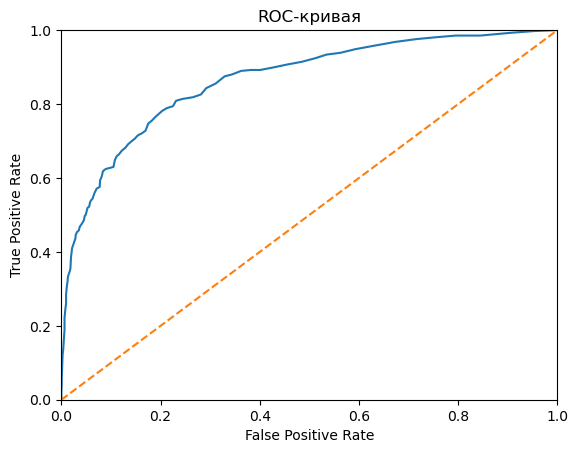

In [36]:
# Построим ROC-кривую и покажем AUC-ROC лучшей модели.
model_rfc = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=RANDOM_STATE)
model_rfc.fit(features_upsampled, target_upsampled)
predicted_valid_upsampled_rfc = pd.Series(model_rfc.predict(features_valid))

probabilities_valid = model_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Random Forest Classifier', auc_roc)

plt.figure()

# построим график
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# применим функции plt.xlim() и plt.ylim(), чтобы
# установить границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# применим функции plt.xlabel() и plt.ylabel(), чтобы
# подписать оси "False Positive Rate" и "True Positive Rate"
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавим к графику заголовок "ROC-кривая" функцией plt.title()
plt.title('ROC-кривая')

plt.show()


Модель случайного леса показала лучшее значение F-меры. Поэтому тестировать будем на этой модели.
Для модели Random Forest Classifier найдем значения n_estimators и max_depth, при которых она будет показывать лучшие результаты.


In [37]:
%%time

best_model_rfc = None
best_result_rfc = 0
best_depth_rfc = 0
best_est_rfc = 0

for est in range(1, 151, 5):
    for depth in range(1, 20, 2):
        model_rfc = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)
        model_rfc.fit(features_train, target_train)
        result = (model_rfc.score(features_valid, target_valid)) * 100
        if result > best_result_rfc:
            best_model_rfc = model_rfc
            best_result_rfc = result
            best_depth_rfc = depth
            best_est_rfc = est

print(f'Лучшая точность предсказаний: {best_result_rfc.round(2)}%, была достигнута при глубине {best_depth_rfc}, {best_est_rfc} деревьях.')
print(f"Accuracy модели: {best_result_rfc / 100}, depth: {best_depth_rfc}, est: {best_est_rfc}")


Лучшая точность предсказаний: 87.15%, была достигнута при глубине 9, 21 деревьях.
Accuracy модели: 0.8715, depth: 9, est: 21
CPU times: total: 2min 23s
Wall time: 2min 23s


### Вывод

* Лучшие результаты показал способ борьбы с дисбалансом class_weight- применим его;
* Работать дальше будем с моделью Random Forest Classifier со значением n_estimators =21 и max_depth =9.


## Тестирование модели

In [38]:
%%time

# Обучим финальную модель и проверим её на тестовой выборке.
model_final_rfc = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=21, max_depth=9, class_weight='balanced')
model_final_rfc.fit(features_train, target_train)
predicted_test_final_rfc = model_final_rfc.predict(features_test)
probabilities_one_valid = model_final_rfc.predict_proba(features_test)[:, 1]
print('F1-мера:', f1_score(target_test, predicted_test_final_rfc))
print("ROC_auc:", roc_auc_score(target_test, probabilities_one_valid))


F1-мера: 0.6064209274673008
ROC_auc: 0.8505485454637995
CPU times: total: 172 ms
Wall time: 160 ms


In [39]:
# выводим метрики лучшей модели.
report_rfc_final = classification_report(target_test, predicted_test_final_rfc, output_dict=True)
# а затем создадим Dataframe.
report_rfc_f = pd.DataFrame(report_rfc_final).transpose()

report_rfc_f


precision    recall  f1-score    support
0              0.902937  0.887633  0.895220  1593.0000
1              0.587558  0.626536  0.606421   407.0000
accuracy       0.834500  0.834500  0.834500     0.8345
macro avg      0.745248  0.757085  0.750820  2000.0000
weighted avg   0.838758  0.834500  0.836449  2000.0000

In [40]:
# Выведем таблицу важности признаков.
# модель - это обученная модель
importances = model_final_rfc.feature_importances_

# функции обучения - это кадр данных функций обучения.
feature_list = list(features_test.columns)

# Извлечение важности функций в фрейм данных.
feature_results = pd.DataFrame({'feature': feature_list, 'importance': importances})

# Показать 10 самых важных
feature_results = feature_results.sort_values('importance', ascending=False).reset_index(drop=True)

feature_results.head(10)


feature  importance
0                Age    0.330541
1      NumOfProducts    0.215103
2            Balance    0.110224
3        CreditScore    0.078196
4    EstimatedSalary    0.074643
5     IsActiveMember    0.065394
6             Tenure    0.041704
7  Geography_Germany    0.041636
8        Gender_Male    0.020342
9    Geography_Spain    0.012422

<Figure size 1200x1000 with 0 Axes>

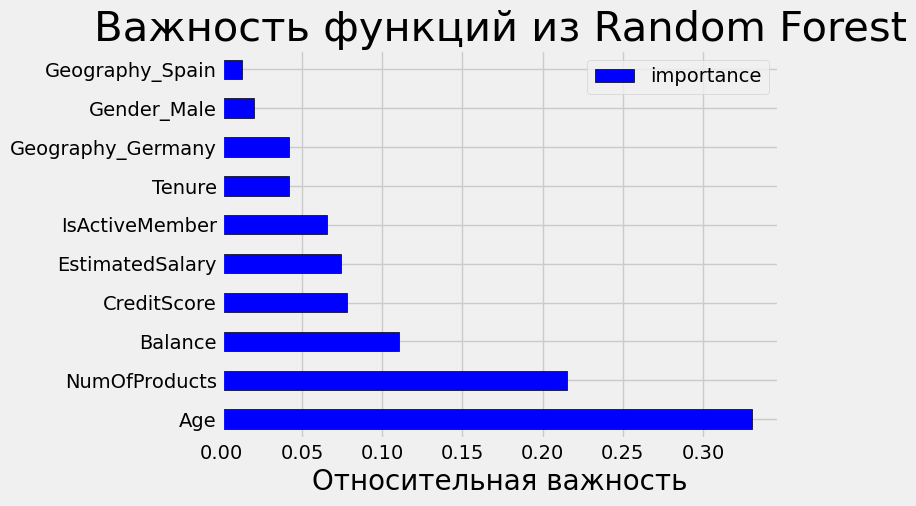

In [41]:
# Давайте построим график важности функций для визуального сравнения.
plt.figure(figsize=(12, 10))
plt.style.use('fivethirtyeight')

# Отобразим 10 наиболее важных функций на горизонтальной гистограмме.
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance',
    edgecolor = 'k',
    kind='barh', color = 'blue');
plt.xlabel('Относительная важность', size = 20);
plt.ylabel('')
plt.title('Важность функций из Random Forest', size = 30);


### Общий вывод.

Для анализа нам был дан датасет с информацией о клиентах банка, которая включает: фамилию, Кредитный рейтинг, страну, пол клиента, возраст клиента, какое время он пользовался продуктами банка, какими продуктами пользовался, сколько у клиента было карт, а так же остался ли он клиентом банка или нет (столбец "Exited").

Изучение данных дало следующие результаты:

* клиентами банка являются жители стран France, Germany, Spain;
* женщин среди клиентов, меньше чем мужчин почти на 1000;
* возраст клиентов от 18 и до 92 лет;
* подавляющее большинство клиентов используют 1 или 2 банковских продукта;
* продолжительность лет, в течении которых клиенты пользовались банковскими продуктами варьируется от 0 до 10;
* на момент предоставления данных, почти 20% клиентов ушли из банка.

Далее мы выделили признаки и целевой признак, разбили датасет на обучающую тестовую и валидационную выборки.

Для обучения мы взяли две модели -- линейную регрессию и модель случайного леса.

В процессе обучения моделей мы попробовали не только различные гиперпараметры, но и уменьшение классов -- downsample, увеличение классов -- upsampled, а так же коррекцию баланса классов и изменение их веса.

Самыми важными признаками для модели при принятии решения будут:
* возраст клиента;
* количество используемых продуктов;
* баланс счета;
* кредитный рейтинг;
* предполагаемая зарплата.

Проверив и протестировав модели выяснили, что лучшей оказалась модель случайного леса с параметрами est=21, depth=9, и результатом F1-меры равным 0.606421, это соответствует заданию заказчика.